In [1]:
import pandas as pd
import numpy as np
import optuna
import sklearn
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data_for_model.csv')

In [3]:
gender_mapper = {'M' : 1, 'F' : 0}
df['gender'] = df['gender'].map(gender_mapper)
y = df['final_target']
X = df.drop('final_target', axis = 1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1)

In [5]:
from pycaret.classification import *
s = setup(X_train, target = y_train, numeric_imputation = 'median')

,Description,Value
0,Session id,4441
1,Target,final_target
2,Target type,Binary
3,Original data shape,"(37012, 48)"
4,Transformed data shape,"(37012, 48)"
5,Transformed train set shape,"(25908, 48)"
6,Transformed test set shape,"(11104, 48)"
7,Numeric features,47
8,Rows with missing values,50.6%
9,Preprocess,True


In [6]:
best = compare_models(sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9608,0.8442,0.1315,0.8911,0.2283,0.2196,0.3325,2.3190
gbc,Gradient Boosting Classifier,0.9589,0.8408,0.0906,0.8267,0.1622,0.1549,0.2630,2.8190
lightgbm,Light Gradient Boosting Machine,0.9598,0.8400,0.1341,0.7644,0.2269,0.2167,0.3080,0.2700
xgboost,Extreme Gradient Boosting,0.9604,0.8216,0.1524,0.7672,0.2512,0.2404,0.3272,1.6920
ada,Ada Boost Classifier,0.9573,0.8196,0.0679,0.6670,0.1225,0.1156,0.2020,0.6010
rf,Random Forest Classifier,0.9589,0.8158,0.0758,0.9518,0.1394,0.1340,0.2589,2.0490
et,Extra Trees Classifier,0.9566,0.8131,0.0200,1.0000,0.0391,0.0375,0.1347,0.4720
lr,Logistic Regression,0.9557,0.7838,0.0061,0.3500,0.0119,0.0110,0.0424,0.7000
lda,Linear Discriminant Analysis,0.9556,0.7758,0.0235,0.5094,0.0445,0.0405,0.0987,0.2670
qda,Quadratic Discriminant Analysis,0.8971,0.7513,0.2648,0.1440,0.1862,0.1366,0.1439,0.2220


In [7]:
model_comparison = pull()
model_comparison = model_comparison[['Model', 'Accuracy', 'AUC']]

In [8]:
model_comparison

,Model,Accuracy,AUC
catboost,CatBoost Classifier,0.9608,0.8442
gbc,Gradient Boosting Classifier,0.9589,0.8408
lightgbm,Light Gradient Boosting Machine,0.9598,0.8400
xgboost,Extreme Gradient Boosting,0.9604,0.8216
ada,Ada Boost Classifier,0.9573,0.8196
rf,Random Forest Classifier,0.9589,0.8158
et,Extra Trees Classifier,0.9566,0.8131
lr,Logistic Regression,0.9557,0.7838
lda,Linear Discriminant Analysis,0.9556,0.7758
qda,Quadratic Discriminant Analysis,0.8971,0.7513


In [871]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
import optuna
from optuna.samplers import TPESampler
import catboost
import pickle


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize")
study.optimize(objective, n_trials=50)

[I 2023-05-07 21:20:23,503] A new study created in memory with name: catboost
[I 2023-05-07 21:20:30,965] Trial 0 finished with value: 0.815782502379314 and parameters: {'iterations': 165, 'learning_rate': 0.16976722357497712, 'depth': 3, 'l2_leaf_reg': 2.805516878388893e-07, 'bootstrap_type': 'Bayesian', 'random_strength': 0.2421229489492095, 'bagging_temperature': 10.273710827744504, 'od_type': 'Iter', 'od_wait': 11, 'min_data_in_leaf': 5}. Best is trial 0 with value: 0.815782502379314.
[I 2023-05-07 21:21:07,360] Trial 1 finished with value: 0.8386132356451703 and parameters: {'iterations': 619, 'learning_rate': 0.08369750965001758, 'depth': 5, 'l2_leaf_reg': 0.056140926290713364, 'bootstrap_type': 'Bayesian', 'random_strength': 0.00028273519715980535, 'bagging_temperature': 17.29518885357105, 'od_type': 'IncToDec', 'od_wait': 17, 'min_data_in_leaf': 5}. Best is trial 1 with value: 0.8386132356451703.
Training has stopped (degenerate solution on iteration 810, probably too small l2-

In [872]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  50
Best trial:
  Value:  0.8557403858867282
  Params: 
    iterations: 676
    learning_rate: 0.0777662249513019
    depth: 10
    l2_leaf_reg: 96.25386504668069
    bootstrap_type: Bayesian
    random_strength: 1.890873280250556e-07
    bagging_temperature: 0.32953593389478936
    od_type: IncToDec
    od_wait: 21
    min_data_in_leaf: 2


In [9]:
from catboost import CatBoostClassifier
params = {'iterations': 676, 'learning_rate': 0.0777662249513019, 'depth': 10, 'l2_leaf_reg': 96.25386504668069, 'bootstrap_type': 'Bayesian', 'random_strength': 1.890873280250556e-07, 'bagging_temperature': 0.32953593389478936, 'od_type': 'IncToDec', 'od_wait': 21, 'min_data_in_leaf': 2}
cat = CatBoostClassifier(**params, verbose = False).fit(X_train, y_train)

In [10]:
auc_original = cross_val_score(cat, X_test, y_test, cv = 10, scoring = 'roc_auc')
auc_original
print("AUC: %0.3f (+/- %0.3f)" % (auc_original.mean(), auc_original.std() * 2))

AUC: 0.850 (+/- 0.039)


In [11]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
# Selecting the Best important features according to LightGBM using SelectFromModel
sfm_selector = SelectFromModel(estimator = LGBMClassifier(), max_features = 15)
sfm_selector.fit(X_train, y_train)
X_train.columns[sfm_selector.get_support()]

Index(['admission_age', 'hemoglobin', 'wbc', 'potassium', 'magnesium',
       'glucose', 'bun', 'aniongap', 'ptt', 'po2', 'heart_rate', 'sbp', 'dbp',
       'temperature', 'urine_output'],
      dtype='object')

In [12]:
X_train_compact = X_train[['admission_age', 'hemoglobin', 'wbc', 'potassium', 'magnesium',
       'glucose', 'bun', 'aniongap', 'ptt', 'po2', 'heart_rate', 'sbp', 'dbp',
       'temperature', 'urine_output']]
X_test_compact = X_test[['admission_age', 'hemoglobin', 'wbc', 'potassium', 'magnesium',
       'glucose', 'bun', 'aniongap', 'ptt', 'po2', 'heart_rate', 'sbp', 'dbp',
       'temperature', 'urine_output']]

In [13]:
compact_model = CatBoostClassifier(verbose = False).fit(X_train_compact, y_train)

In [14]:
auc_compact = cross_val_score(compact_model, X_test_compact, y_test, cv = 10, scoring = 'roc_auc')
auc_compact
print("AUC: %0.3f (+/- %0.3f)" % (auc_compact.mean(), auc_compact.std() * 2))

AUC: 0.796 (+/- 0.058)


In [108]:
# Let's try engineering some features: 
new_features = X.copy()
new_features['older_septic'] = np.where((new_features['admission_age'] >= 70) & (new_features['sepsis'] == 1), 1, 0)
new_features['cardiac_risk_score'] = (2 * new_features['chf']) + new_features['old_mi'] + new_features['acute_mi'] + (5 * new_features['cardiac_surgery'])

In [109]:
new_cols = ['admission_age', 'hemoglobin', 'wbc', 'potassium', 'magnesium',
       'glucose', 'bun', 'aniongap', 'ptt', 'po2', 'heart_rate', 'sbp', 'dbp',
       'temperature', 'urine_output', 'older_septic', 'cardiac_risk_score']

In [110]:
new_features = new_features[new_cols]

In [111]:
X_train_eng = new_features.loc[X_train.index]
X_test_eng = new_features.loc[X_test.index]

In [112]:
compact_model_eng = CatBoostClassifier(verbose = False).fit(X_train_eng, y_train)

In [113]:
auc_eng = cross_val_score(compact_model_eng, X_test_eng, y_test, cv = 10, scoring = 'roc_auc')
auc_eng
print("AUC: %0.3f (+/- %0.3f)" % (auc_eng.mean(), auc_eng.std() * 2))

AUC: 0.820 (+/- 0.038)


In [29]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr_compact, tpr_compact, _ = roc_curve(y_test, compact_model.predict_proba(X_test_compact)[:, 1])
fpr_eng, tpr_eng, _ = roc_curve(y_test, compact_model_eng.predict_proba(X_test_eng)[:, 1])

precision_compact, recall_compact, pr_thresholds_compact = precision_recall_curve(y_test, compact_model.predict_proba(X_test_compact)[:, 1])
precision_eng, recall_eng, pr_thresholds_eng = precision_recall_curve(y_test, compact_model_eng.predict_proba(X_test_eng)[:, 1])

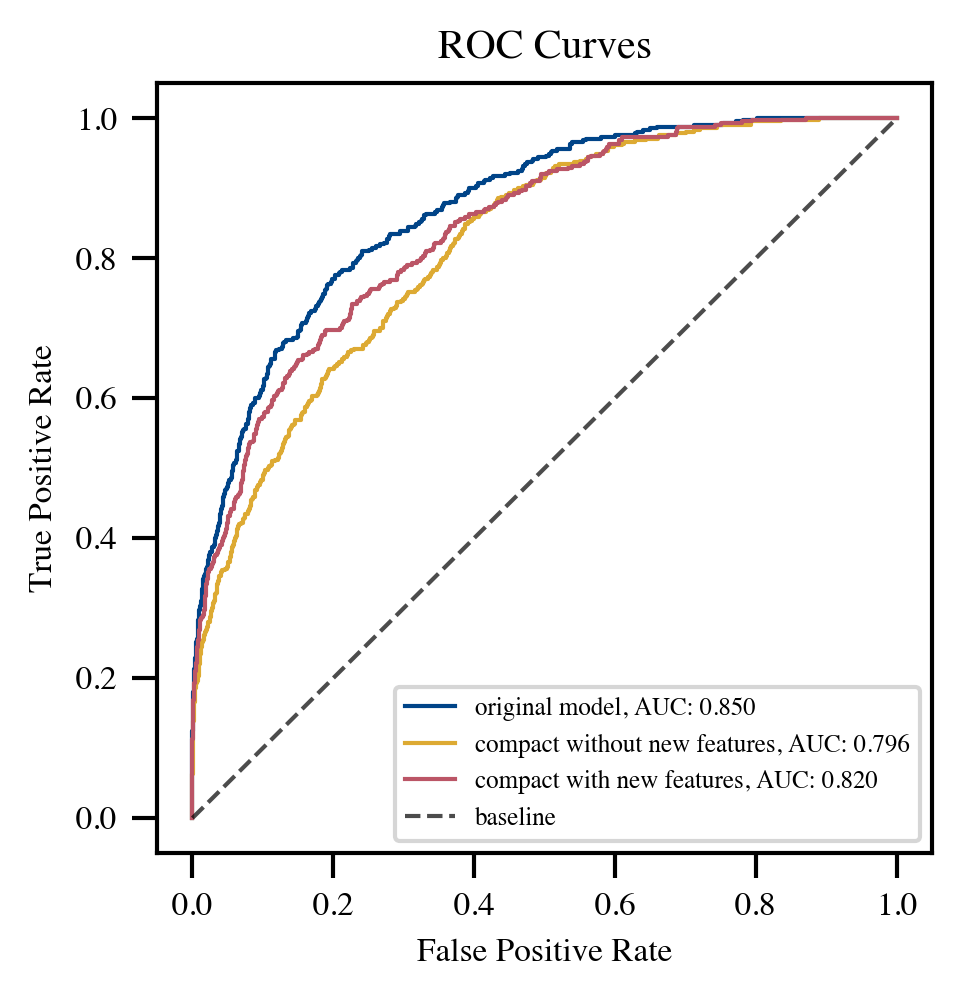

In [62]:
import scienceplots
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
plt.style.use(['nature', 'notebook', 'high-contrast'])
plt.figure(dpi = 300, figsize = (3.333, 3.333))
plt.rcParams["font.family"] = "Times"
plt.rcParams["axes.titlesize"] = 10 # Set title font size to 5
plt.rcParams["legend.fontsize"] = 6 # Set legend font size to 5

fpr, tpr, _ = roc_curve(y_test, cat.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label = 'original model, AUC: {:.3f}'.format(auc_original.mean()), linewidth = 1)
plt.plot(fpr_compact, tpr_compact, label = 'compact without new features, AUC: {:.3f}'.format(auc_compact.mean()), linewidth = 1)
plt.plot(fpr_eng, tpr_eng, label = 'compact with new features, AUC: {:.3f}'.format(auc_eng.mean()), linewidth = 1)
plt.plot([0, 1], [0,1], linestyle = '--', color = 'black', alpha = 0.7, label = 'baseline', linewidth = 1)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('False Positive Rate', fontsize = 8)
plt.ylabel('True Positive Rate', fontsize = 8)

plt.legend(loc = 'lower right')

plt.title('ROC Curves')

plt.savefig('roc.tiff', bbox_inches="tight", dpi = 400)


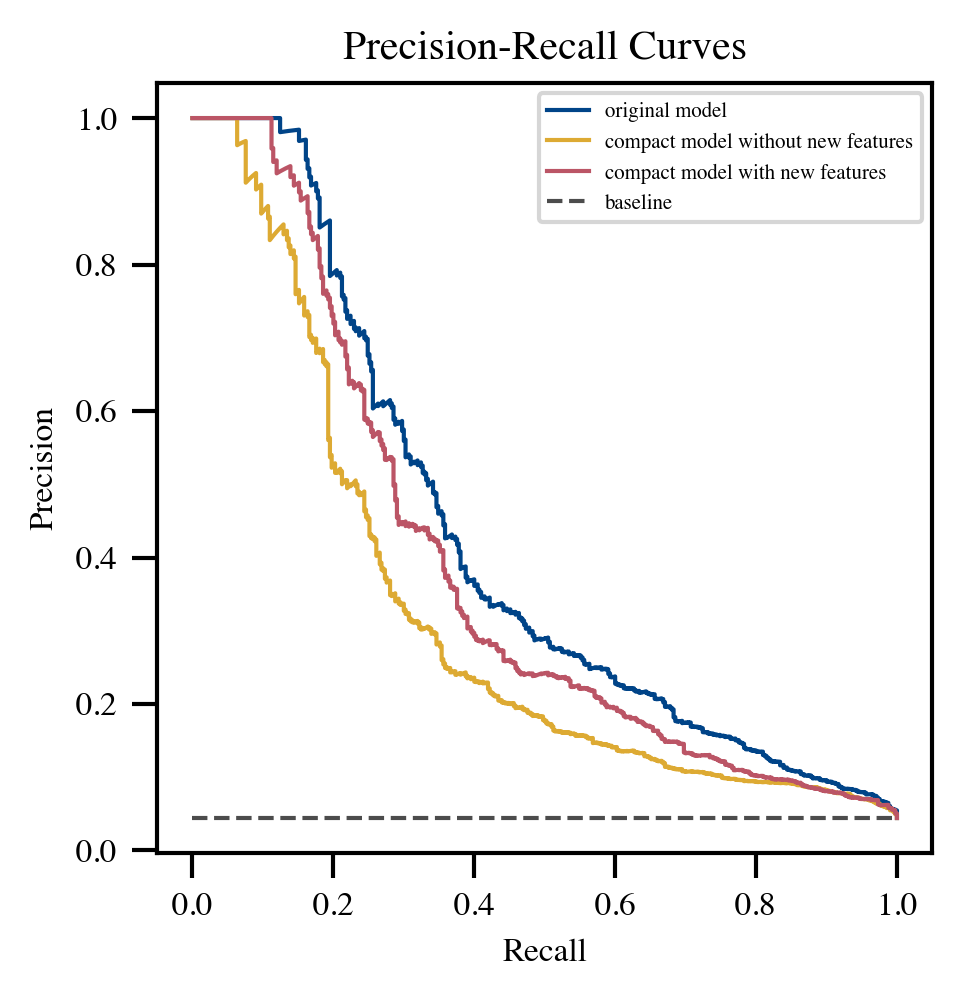

In [71]:
plt.style.use(['nature', 'notebook', 'high-contrast'])
plt.figure(dpi = 300, figsize = (3.333, 3.333))
plt.rcParams["font.family"] = "Times"
plt.rcParams["axes.titlesize"] = 10 # Set title font size to 5
plt.rcParams["legend.fontsize"] = 5 # Set legend font size to 5




precision, recall, pr_thresholds = precision_recall_curve(y_test, cat.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label = 'original model', linewidth = 1)
plt.plot(recall_compact, precision_compact, label = 'compact model without new features', linewidth = 1)
plt.plot(recall_eng, precision_eng, label = 'compact model with new features', linewidth = 1)
baseline = (y_test == 1).sum() / len(y_test)
plt.plot([0,1], [baseline, baseline], linestyle='--', color = 'black', alpha = 0.7, label = 'baseline', linewidth = 1)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Recall', fontsize = 8)
plt.ylabel('Precision', fontsize = 8)
plt.title('Precision-Recall Curves')

plt.legend(loc = 'upper right')
plt.savefig('pr.tiff', dpi = 400, format='tiff', bbox_inches="tight")

In [69]:
import shap
# Fits the explainer
explainer = shap.Explainer(compact_model_eng.predict, X_test_eng)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_eng)

Permutation explainer: 9255it [06:33, 23.01it/s]                          


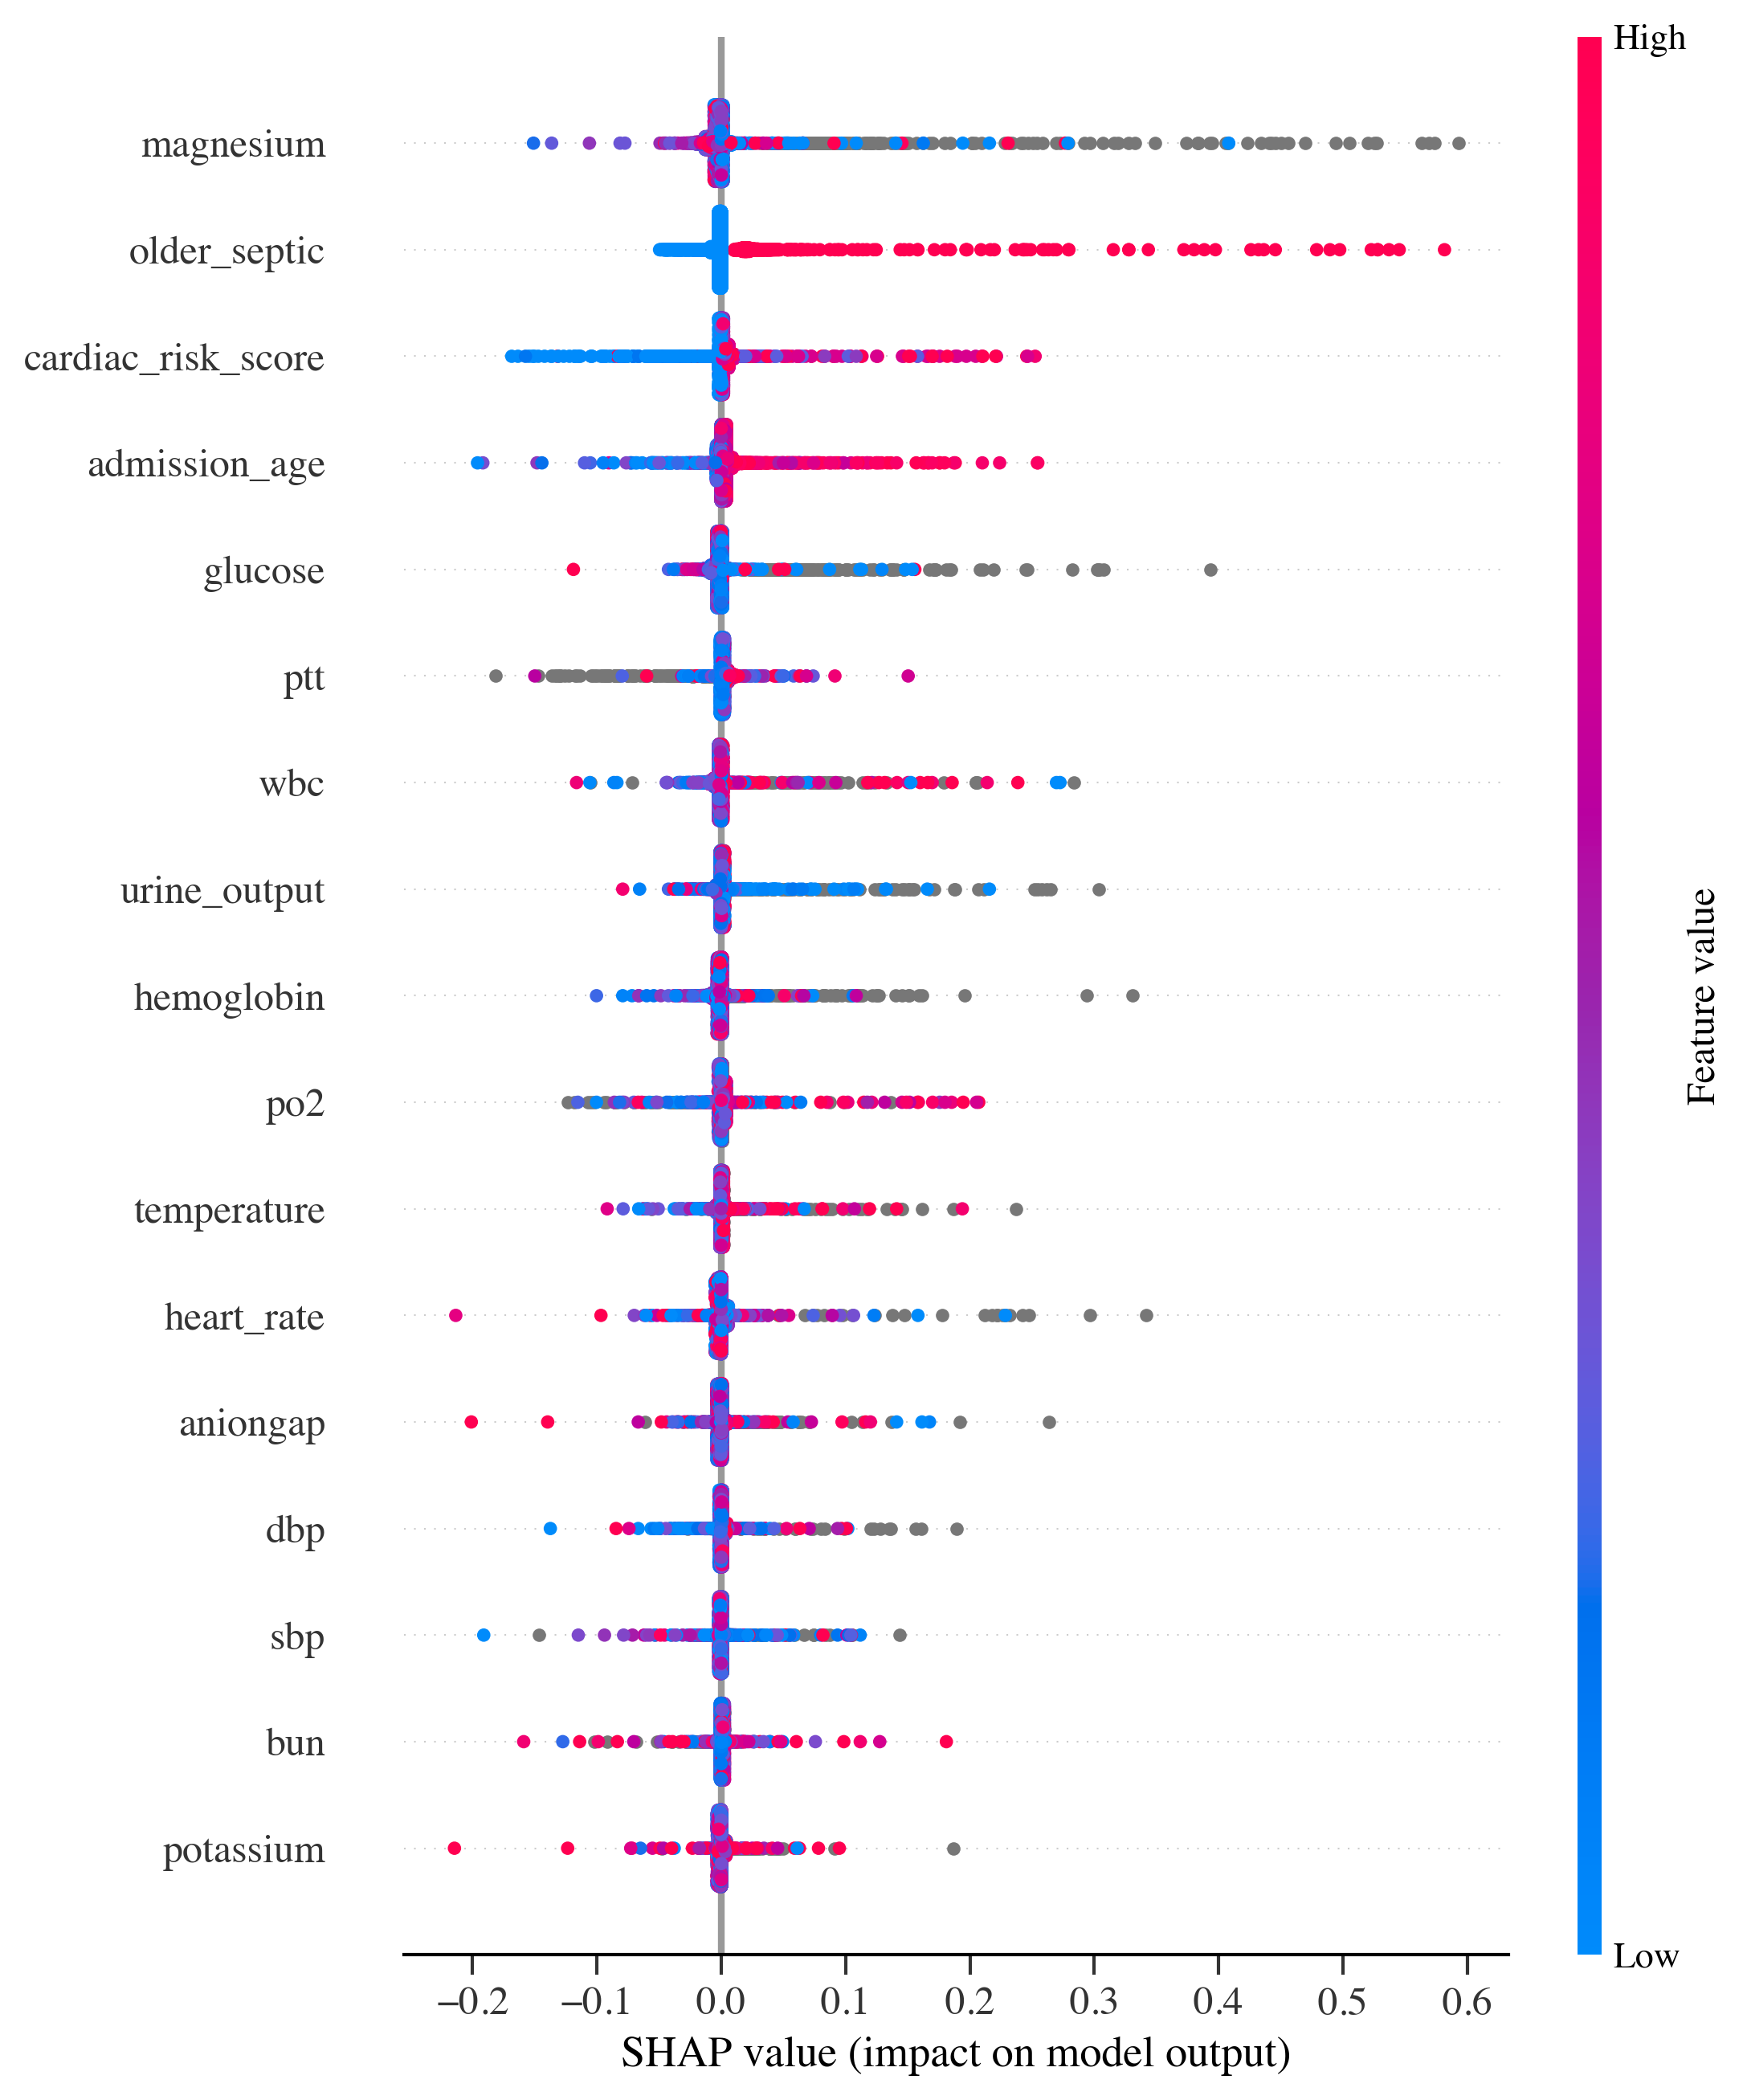

In [72]:
plt.rcParams["font.family"] = "Times"
plt.figure(dpi= 300)
shap_figure = shap.summary_plot(shap_values, X_test_eng, show=False)
plt.gcf().set_size_inches(7.5, 8.75)
plt.tick_params(axis='both', which='major', labelsize= 12)
plt.savefig('shap.tiff', dpi = 300, format='tiff')
plt.show()


In [73]:
ids = np.argsort(compact_model_eng.feature_importances_)
feature_names = X_test_eng.columns[ids]
importances = compact_model_eng.feature_importances_[ids]

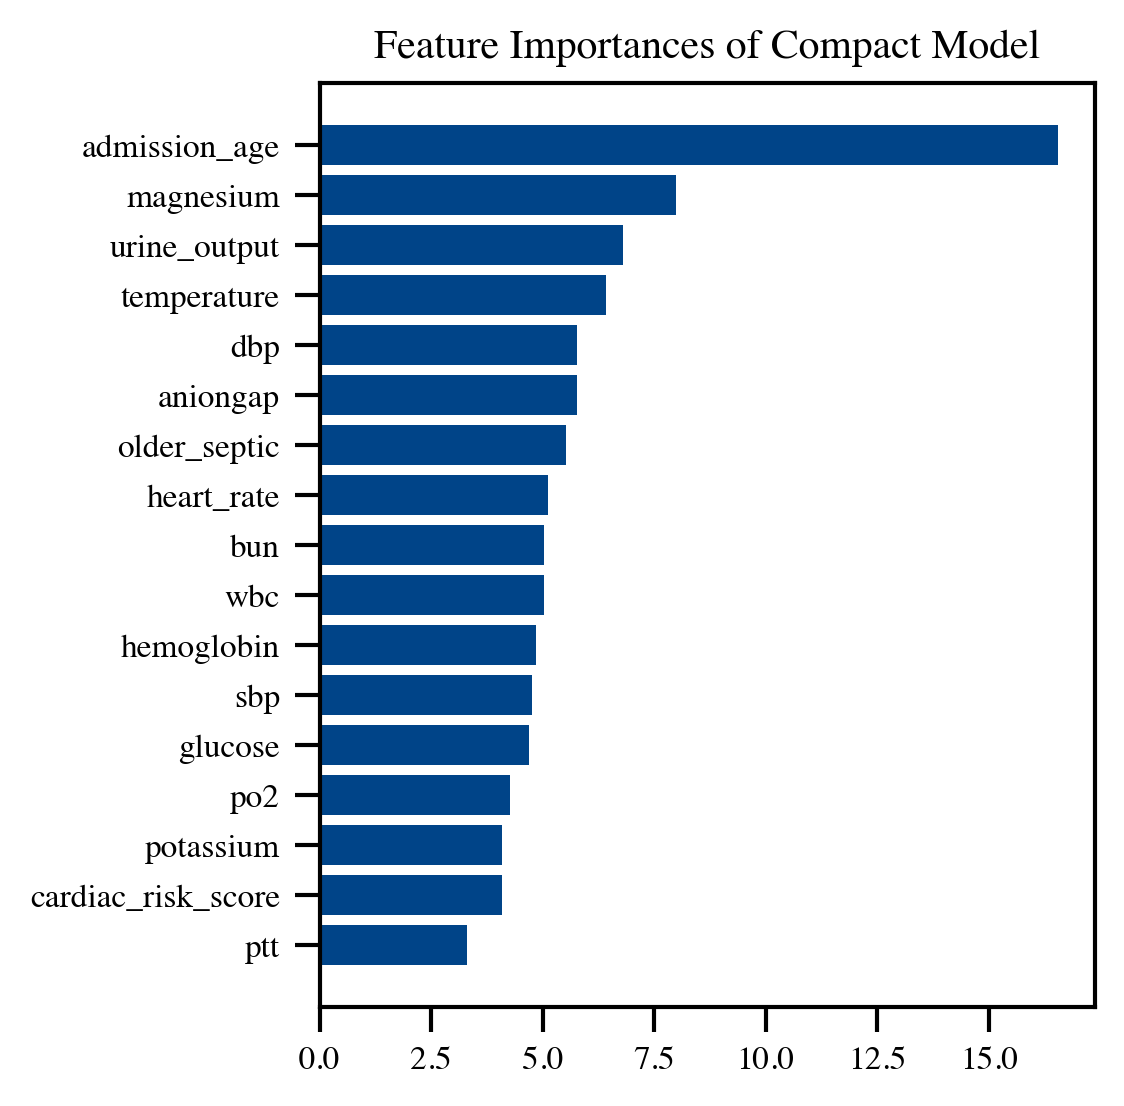

In [74]:
plt.style.use(['nature', 'notebook', 'high-contrast'])
plt.rcParams["font.family"] = "Times"
plt.rcParams["axes.titlesize"] = 10 # Set title font size to 5
plt.rcParams["legend.fontsize"] = 5 # Set legend font size to 5
plt.figure(dpi = 300, figsize = (3.333, 4))
plt.barh(feature_names, width = importances)
plt.title('Feature Importances of Compact Model')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('importances.tiff', bbox_inches = 'tight', dpi = 300, format='tiff')

In [77]:
X_test_eng2 = X_test.copy()
X_test_eng2['older_septic'] = np.where((X_test_eng2['admission_age'] >= 70) & (X_test_eng2['sepsis'] == 1), 1, 0)
X_test_eng2['cardiac_risk_score'] = (2 * X_test_eng2['chf']) + X_test_eng2['old_mi'] + X_test_eng2['acute_mi'] + (5 * X_test_eng2['cardiac_surgery'])
X_test_eng2 = X_test_eng2[new_cols]

In [78]:
X_test_ventilated = X_test[X_test['mechanical_ventilation'] == 1]
y_test_ventilated = y[X_test_ventilated.index]
X_test_ventilated_compact = X_test_compact[X_test_compact.index.isin(X_test_ventilated.index)]
X_test_ventilated_eng = X_test_eng2[X_test_eng2.index.isin(X_test_ventilated.index)]

sets_1 = [X_test_ventilated, X_test_ventilated_compact, X_test_ventilated_eng]

X_test_not_ventilated = X_test[X_test['mechanical_ventilation'] == 0]
y_test_not_ventilated = y[X_test_not_ventilated.index]
X_test_not_ventilated_compact = X_test_compact[X_test_compact.index.isin(X_test_not_ventilated.index)]
X_test_not_ventilated_eng = X_test_eng2[X_test_eng2.index.isin(X_test_not_ventilated.index)]
sets_2 = [X_test_not_ventilated, X_test_not_ventilated_compact, X_test_not_ventilated_eng]

sets_vent = [sets_1, sets_2, y_test_ventilated, y_test_not_ventilated]

X_test_septic = X_test[X_test['sepsis'] == 1]
y_test_septic = y[X_test_septic.index]
X_test_septic_compact = X_test_compact[X_test_compact.index.isin(X_test_septic.index)]
X_test_septic_eng = X_test_eng2[X_test_eng2.index.isin(X_test_septic.index)]
sets_3 = [X_test_septic, X_test_septic_compact, X_test_septic_eng]

X_test_not_septic = X_test[X_test['sepsis'] == 0]
y_test_not_septic = y[X_test_not_septic.index]
X_test_not_septic_compact = X_test_compact[X_test_compact.index.isin(X_test_not_septic.index)]
X_test_not_septic_eng = X_test_eng2[X_test_eng2.index.isin(X_test_not_septic.index)]
sets_4 = [X_test_not_septic, X_test_not_septic_compact, X_test_not_septic_eng]

sets_sepsis = [sets_3, sets_4, y_test_septic, y_test_not_septic]

X_test_surgery = X_test[X_test['cardiac_surgery'] == 1]
y_test_surgery = y[X_test_surgery.index]
X_test_surgery_compact = X_test_compact[X_test_compact.index.isin(X_test_surgery.index)]
X_test_surgery_eng = X_test_eng2[X_test_eng2.index.isin(X_test_surgery.index)]
sets_5 = [X_test_surgery, X_test_surgery_compact, X_test_surgery_eng]

X_test_no_surgery = X_test[X_test['cardiac_surgery'] == 0]
y_test_no_surgery = y[X_test_no_surgery.index]
X_test_no_surgery_compact = X_test_compact[X_test_compact.index.isin(X_test_no_surgery.index)]
X_test_no_surgery_eng = X_test_eng2[X_test_eng2.index.isin(X_test_no_surgery.index)]
sets_6 = [X_test_no_surgery, X_test_no_surgery_compact, X_test_no_surgery_eng]

sets_surgery = [sets_5, sets_6, y_test_surgery, y_test_no_surgery]

X_test_chf = X_test[X_test['chf'] == 1]
y_test_chf = y[X_test_chf.index]
X_test_chf_compact = X_test_compact[X_test_compact.index.isin(X_test_chf.index)]
X_test_chf_eng = X_test_eng2[X_test_eng2.index.isin(X_test_chf.index)]
sets_7 = [X_test_chf, X_test_chf_compact, X_test_chf_eng]

X_test_no_chf = X_test[X_test['chf'] == 0]
y_test_no_chf = y[X_test_no_chf.index]
X_test_no_chf_compact = X_test_compact[X_test_compact.index.isin(X_test_no_chf.index)]
X_test_no_chf_eng = X_test_eng2[X_test_eng2.index.isin(X_test_no_chf.index)]
sets_8 = [X_test_no_chf, X_test_no_chf_compact, X_test_no_chf_eng]

sets_chf = [sets_7, sets_8, y_test_chf, y_test_no_chf]


major_sets = [sets_vent, sets_sepsis, sets_surgery, sets_chf]

vent_labels = ['ventilated', 'not ventilated']
septic_labels = ['septic', 'not septic']
surgery_labels = ['surgery', 'no surgery']
chf_labels = ['chf', 'no chf']
all_labels = [vent_labels, septic_labels, surgery_labels, chf_labels]

marker_styles = ['o', 's', '^']

all_models = [cat, compact_model, compact_model_eng]
model_labels = ['org', 'com', 'eng']

all_titles = ['Mechanical ventilation', 'Sepsis', 'Cardiac surgery', 'Congestive Heart Failure']


X_test_age_1 = X_test[(X_test['admission_age'] >= 18) & (X_test['admission_age'] < 50)]
y_test_age_1 = y[X_test_age_1.index]
X_test_age_1_compact = X_test_compact[X_test_compact.index.isin(X_test_age_1.index)]
X_test_age_1_eng = X_test_eng2[X_test_eng2.index.isin(X_test_age_1.index)]
sets_9 = [X_test_age_1, X_test_age_1_compact, X_test_age_1_eng]

X_test_age_2 = X_test[(X_test['admission_age'] >= 50) & (X_test['admission_age'] < 65)]
y_test_age_2 = y[X_test_age_2.index]
X_test_age_2_compact = X_test_compact[X_test_compact.index.isin(X_test_age_2.index)]
X_test_age_2_eng = X_test_eng2[X_test_eng2.index.isin(X_test_age_2.index)]
sets_10 = [X_test_age_2, X_test_age_2_compact, X_test_age_2_eng]

X_test_age_3 = X_test[(X_test['admission_age'] >= 65) & (X_test['admission_age'] < 80)]
y_test_age_3 = y[X_test_age_3.index]
X_test_age_3_compact = X_test_compact[X_test_compact.index.isin(X_test_age_3.index)]
X_test_age_3_eng = X_test_eng2[X_test_eng2.index.isin(X_test_age_3.index)]
sets_11 = [X_test_age_3, X_test_age_3_compact, X_test_age_3_eng]

X_test_age_4 = X_test[X_test['admission_age'] >= 80]
y_test_age_4= y[X_test_age_4.index]
X_test_age_4_compact = X_test_compact[X_test_compact.index.isin(X_test_age_4.index)]
X_test_age_4_eng = X_test_eng2[X_test_eng2.index.isin(X_test_age_4.index)]
sets_12 = [X_test_age_4, X_test_age_4_compact, X_test_age_4_eng]

sets_age = [sets_9, sets_10, sets_11, sets_12, y_test_age_1, y_test_age_2, y_test_age_3, y_test_age_4]

X_test_sofa_1 = X_test[(X_test['sofa'] >= 0) & (X_test['sofa'] < 2)]
y_test_sofa_1 = y[X_test_sofa_1.index]
X_test_sofa_1_compact = X_test_compact[X_test_compact.index.isin(X_test_sofa_1.index)]
X_test_sofa_1_eng = X_test_eng2[X_test_eng2.index.isin(X_test_sofa_1.index)]
sets_14 = [X_test_sofa_1, X_test_sofa_1_compact, X_test_sofa_1_eng]

X_test_sofa_2 = X_test[(X_test['sofa'] >= 2) & (X_test['sofa'] < 5)]
y_test_sofa_2 = y[X_test_sofa_2.index]
X_test_sofa_2_compact = X_test_compact[X_test_compact.index.isin(X_test_sofa_2.index)]
X_test_sofa_2_eng = X_test_eng2[X_test_eng2.index.isin(X_test_sofa_2.index)]
sets_15 = [X_test_sofa_2, X_test_sofa_2_compact, X_test_sofa_2_eng]

X_test_sofa_3 = X_test[(X_test['sofa'] >= 5) & (X_test['sofa'] < 8)]
y_test_sofa_3 = y[X_test_sofa_3.index]
X_test_sofa_3_compact = X_test_compact[X_test_compact.index.isin(X_test_sofa_3.index)]
X_test_sofa_3_eng = X_test_eng2[X_test_eng2.index.isin(X_test_sofa_3.index)]
sets_16 = [X_test_sofa_3, X_test_sofa_3_compact, X_test_sofa_3_eng]

X_test_sofa_4 = X_test[(X_test['sofa'] >= 8) & (X_test['sofa'] < 11)]
y_test_sofa_4 = y[X_test_sofa_4.index]
X_test_sofa_4_compact = X_test_compact[X_test_compact.index.isin(X_test_sofa_4.index)]
X_test_sofa_4_eng = X_test_eng2[X_test_eng2.index.isin(X_test_sofa_4.index)]
sets_17 = [X_test_sofa_4, X_test_sofa_4_compact, X_test_sofa_4_eng]

X_test_sofa_5 = X_test[X_test['sofa'] >= 11]
y_test_sofa_5 = y[X_test_sofa_5.index]
X_test_sofa_5_compact = X_test_compact[X_test_compact.index.isin(X_test_sofa_5.index)]
X_test_sofa_5_eng = X_test_eng2[X_test_eng2.index.isin(X_test_sofa_5.index)]
sets_18 = [X_test_sofa_5, X_test_sofa_5_compact, X_test_sofa_5_eng]

sets_sofa = [sets_14, sets_15, sets_16, sets_17, sets_18, y_test_sofa_1, y_test_sofa_2, y_test_sofa_3, y_test_sofa_4, y_test_sofa_5]

major_sets_2 = [sets_age, sets_sofa]


age_labels = ['18-49', '50-64', '65-79', '>=80']
sofa_labels = ['0-1', '2-4', '5-7', '8-10', '>=11']

all_labels_2 = [age_labels, sofa_labels]
all_titles_2 = ['Age group', 'SOFA score']


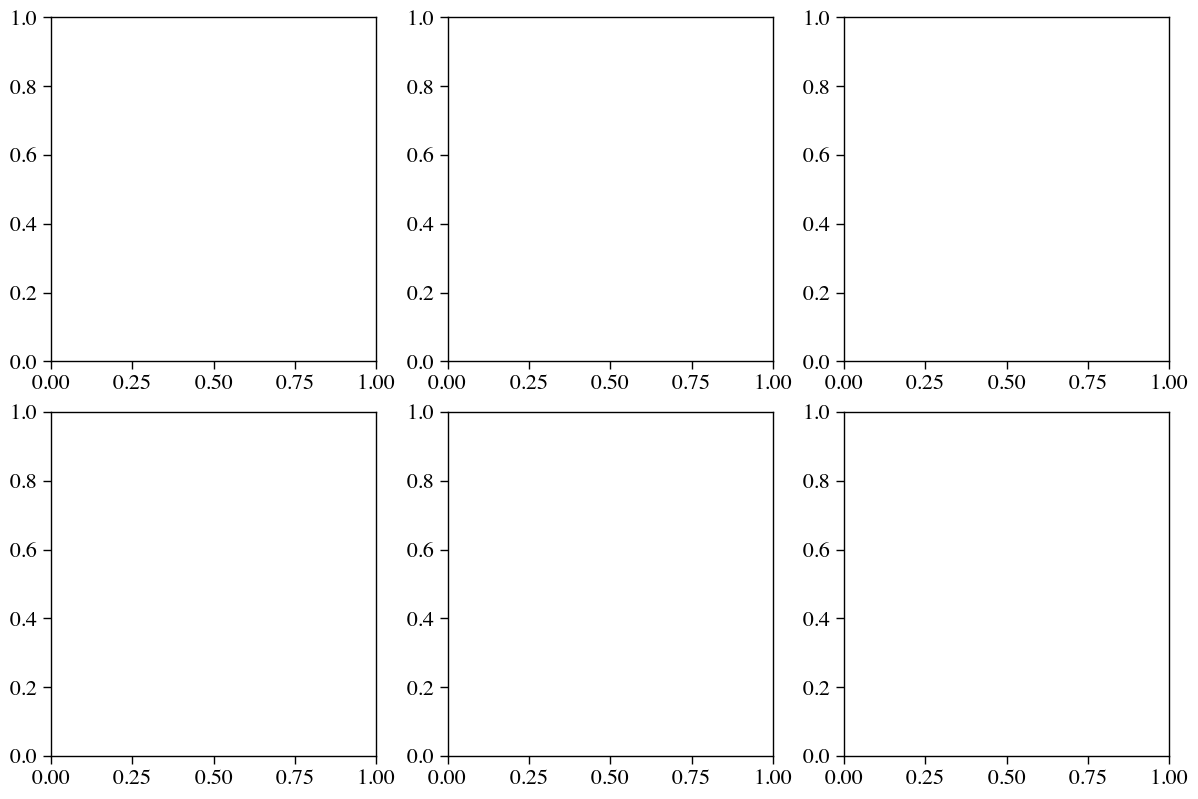

In [79]:
fig, axes = plt.subplots(2, 3, figsize = (12, 8), layout = 'tight')

In [81]:

for ax, major_set, label_group, title in zip(axes.ravel(), major_sets, all_labels, all_titles): 
    sets1 = major_set[0]
    sets2 = major_set[1]
    class1 = major_set[2]
    class2 = major_set[3]
    for model3, set_group_1, set_group_2, style, model_label in zip(all_models, sets1, sets2, marker_styles, model_labels):
        auc1 = cross_val_score(model3, set_group_1, class1, cv = 10, scoring = 'roc_auc').mean()
        auc2 = cross_val_score(model3, set_group_2, class2, cv = 10, scoring = 'roc_auc').mean()
        ax.plot([1, 2], [auc1, auc2], marker = style, markersize = 12, label = model_label)
        ax.set_xticks([1,2], [label_group[0], label_group[1]], rotation = 30)
        ax.set_xlabel(title)
        ax.set_ylabel('AUC')
        ax.grid(alpha = 0.2)
        ax.legend(fontsize = 10)

In [82]:
fig.tight_layout()

In [83]:
for ax, major_set_1, label_group_1, title_1, num in zip(axes.ravel()[-2:], major_sets_2, all_labels_2, all_titles_2, [1, 2]): 
    if num == 2:
        sets11 = major_set_1[0]
        sets22 = major_set_1[1]
        sets33 = major_set_1[2]
        sets44 = major_set_1[3]
        sets55 = major_set_1[4]
        class11 = major_set_1[5]
        class22 = major_set_1[6]
        class33 = major_set_1[7]
        class44 = major_set_1[8]
        class55 = major_set_1[9]
        for model4, set_group_6, set_group_7, set_group_8, set_group_9, set_group_10, style, model_label in zip(all_models, sets11, sets22, sets33, sets44, sets55, marker_styles, model_labels):
            auc11 = np.nanmean(cross_val_score(model3, set_group_6, class11, cv = 10, scoring = 'roc_auc'))
            auc22 = np.nanmean(cross_val_score(model3, set_group_7, class22, cv = 10, scoring = 'roc_auc'))
            auc33 = np.nanmean(cross_val_score(model3, set_group_8, class33, cv = 10, scoring = 'roc_auc'))
            auc44 = np.nanmean(cross_val_score(model3, set_group_9, class44, cv = 10, scoring = 'roc_auc'))
            auc55 = np.nanmean(cross_val_score(model3, set_group_10, class55, cv = 10, scoring = 'roc_auc'))
            ax.plot([1, 2, 3, 4, 5], [auc11, auc22, auc33, auc44, auc55], marker = style, markersize = 12, label = model_label)
            ax.set_xticks([1,2, 3, 4, 5], [label_group_1[0], label_group_1[1], label_group_1[2], label_group_1[3], label_group_1[4]], rotation = 30)
            ax.set_xlabel(title_1)
            ax.set_ylabel('AUC')
            ax.grid(alpha = 0.2)
            ax.legend(fontsize = 10)
    if num == 1:
        sets11 = major_set_1[0]
        sets22 = major_set_1[1]
        sets33 = major_set_1[2]
        sets44 = major_set_1[3]
        class11 = major_set_1[4]
        class22 = major_set_1[5]
        class33 = major_set_1[6]
        class44 = major_set_1[7]
        for model4, set_group_6, set_group_7, set_group_8, set_group_9, style, model_label in zip(all_models, sets11, sets22, sets33, sets44, marker_styles, model_labels):
            auc11 = np.nanmean(cross_val_score(model3, set_group_6, class11, cv = 10, scoring = 'roc_auc'))
            auc22 = np.nanmean(cross_val_score(model3, set_group_7, class22, cv = 10, scoring = 'roc_auc'))
            auc33 = np.nanmean(cross_val_score(model3, set_group_8, class33, cv = 10, scoring = 'roc_auc'))
            auc44 = np.nanmean(cross_val_score(model3, set_group_9, class44, cv = 10, scoring = 'roc_auc'))
            ax.plot([1, 2, 3, 4], [auc11, auc22, auc33, auc44], marker = style, markersize = 12, label = model_label)
            ax.set_xticks([1,2, 3, 4], [label_group_1[0], label_group_1[1], label_group_1[2], label_group_1[3]], rotation = 30)
            ax.set_xlabel(title_1)
            ax.set_ylabel('AUC')
            ax.grid(alpha = 0.2)
            ax.legend(fontsize = 10)

In [84]:
fig.tight_layout()

In [85]:
fig.suptitle('Model Comparison In Different Patient Cohorts', fontsize=16)

Text(0.5, 0.98, 'Model Comparison In Different Patient Cohorts')

In [87]:
fig.tight_layout()

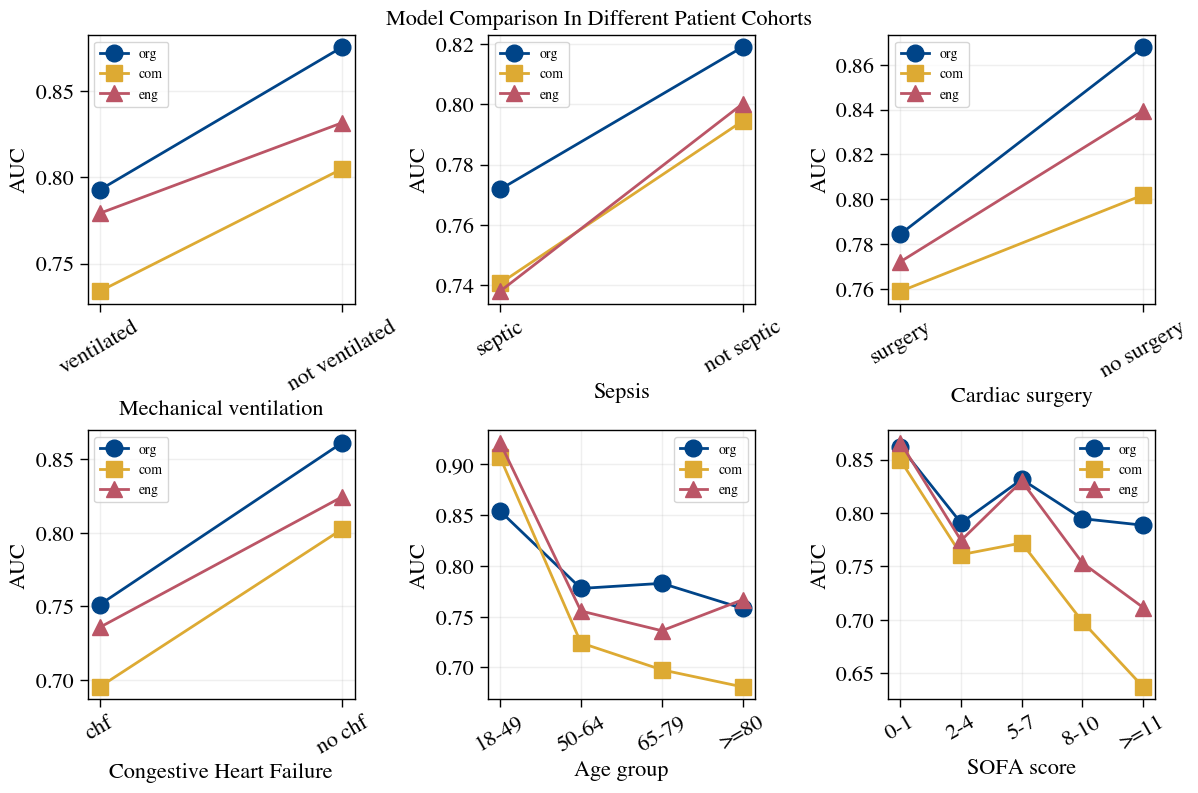

In [88]:
fig

In [89]:
fig.savefig('comparison.tiff', dpi = 300, format='tiff')

In [ ]:
bbox_inches = 'tight', dpi = 300, format='tiff'